## Regresison 

We have a dataset in the form of pairs $(x, y)$ .we want to approximate the relationship between x and y with a function such as f so that we have: $f(x) ∼ y$. to do so, we use the polynomial approximation as follows, where $k$ is the degree of the polynomial: 

$$f(x) = \hat{y} = β_{0} + β_{1}x + β_{2}x^{2} + ... + β_{k}x^{k}$$

##Closed form answer 

to find a closed form for regression problem, we have to tranform it to least sqaure problem : $minimize \ ||Ax-b||_{2}$


using matrixes defined in question, we can transofrm regression problem to least sqaure problem as follows : 

$$minimize \ ||D\beta-Y||_{2}$$ 

answer of above problem is $\boxed{\hat{\beta}=(D^{T}D)^{-1}D^{T} \ Y}$ where $\boxed{(D^{T}D)^{-1}D^{T} \ is  \ pseduo \ inverse \ of \ D}$. 


### import required libraires

In [6]:
import numpy as np
from numpy.linalg import inv 
from numpy import dot
import matplotlib.pyplot as plt 

In [7]:
mu_x,sigma_x=0,1
n_sample_x=20
x=2-3*np.random.normal(mu_x, sigma_x, n_sample_x)
#----------------------
mu_y,sigma_y=-3,3
n_sample_y=20
y=10+np.random.normal(mu_y, sigma_y, n_sample_y)-2*x**2+0.5*x**3

In [8]:
def regression(k,x,y):
   '''
   k : degree of polynomial for approximation 
   x,y : dataset pairs

   '''
   n=len(x)
   #------------------
   D = np.zeros([n,k+1])
   for i in range(0,k+1): 
      temp=x**i
      D[:,i]=temp
   #------------------
   # using closed form formula to find least square answer 
   ps_inverse=dot(inv(dot(D.T,D)),D.T)
   beta_hat=np.dot(ps_inverse,y)
   estimated_y=np.dot(D,beta_hat)

   return estimated_y


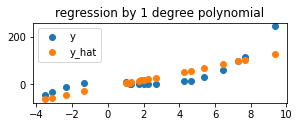

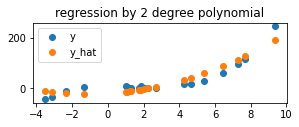

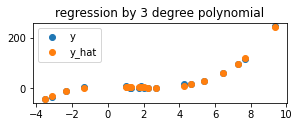

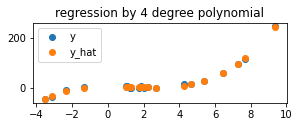

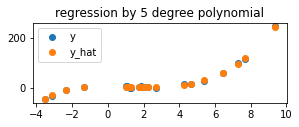

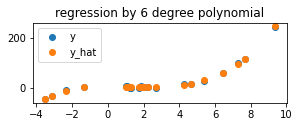

In [9]:
k=[1,2,3,4,5,6]

for i in k : 
    est_y=regression(i,x,y)
    plt.figure(figsize=(10,5))
    plt.subplot(3,2,i)
    plt.scatter(x,y)
    plt.scatter(x,est_y)
    plt.legend(["y", "y_hat"], loc ="upper left")
    plt.title(f"regression by {i} degree polynomial")

### error for regression model : 
in the figures below, we plot the error of $k \ degree \ polynomial$ model for the dataset using the formula below :  
 $$error =\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2}$$

Text(0.5, 1.0, 'error vs k')

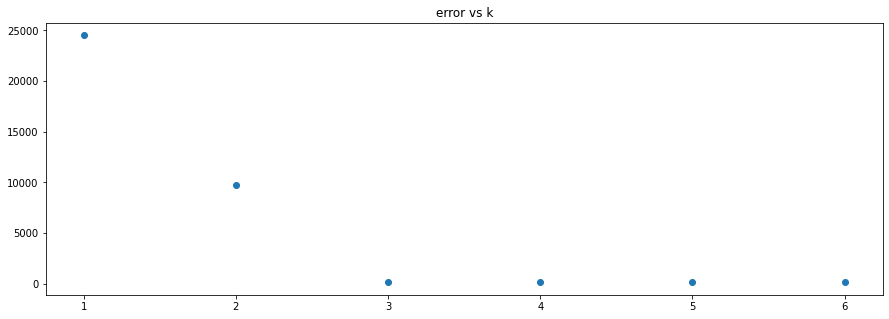

In [10]:
k=[1,2,3,4,5,6]
error_list=[]
#------------------------
for i in k : 
    est_y=regression(i,x,y)
    error=np.sum((est_y-y)**2)
    error_list.append(error)

#------------------------
plt.figure(figsize=(15,5)) 
plt.scatter(k,error_list)
plt.title(f"error vs k")

**conclusion** : as we can see, the form of approximated function is linear at first but as we increase k, polynomial function fit the data. another interseting point is that because original data is 3 degree poly, for $k \ge 3$ error is very close to zero and approximated functions are nearly same.